## Context
We are consultants for ABCDEats Inc (ABCDE), a food delivery service with a vast range of restaurants with different cuisines. We are going to analyze three months of data from 3 cities to provide a data-driven strategy that englobes 3 different segmentation perspectives.

# 0. Import Libraries

In [266]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

# 1. Loading the file

## Metadata

`customer_id` - Unique identifier for each customer <br>
`customer_region` - Geographic region where the customer is located <br>
`customer_age` - Age of the customer <br>
`vendor_count` - Number of unique vendors the customer has ordered from <br>
`product_count` - Total number of products the customer has ordered <br>
`is_chain` - Indicates whether the customer’s order was from a chain restaurant <br>
`first_order` - Number of days from the start of the dataset when the customer first placed an order. <br>
`last_order` - Number of days from the start of the dataset when the customer most recently placed an order. <br>
`last_promo` - The category of the promotion or discount most recently used by the customer. <br>
`payment_method` - Method most recently used by the customer to pay for their orders. <br>
`CUI_(cuisine)`- The amount in monetary units spent by the customer from the indicated type of cuisine. <br>
- CUI_Beverages, CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts','CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', CUI_Thai <br>

`DOW_0 to DOW_6` - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday). <br>
`HR_0 to HR_23` - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM). <br>




In [269]:
ABCDE = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep = ',')   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
ABCDE.head(5)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [270]:
# customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23


### Any footnotes?

In [272]:
ABCDE.tail(5)
# No, there isn't any

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,7.91,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Preliminar notes
customer region -> there are 3 locations, for each city, can we trace a region code per city?

is_chain -> should return a binary result of 0 or 1. replace any value greater than 1 with 1, so that 1 returns "at least 1"

first order -> 

last_promo -> "None" = we can interpret non existent results as "the customer never had a promotion"

HR_0 to HR_23 -> set intervals to fit the data or only display values 




# 2. Data description

In [275]:
# Check the shape
ABCDE.shape

(31888, 56)

In [276]:
ABCDE.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

### Check for disposable rows or columns (with no values)

#### Columns
Only midnight, but the 0 value has a meaning

In [279]:
ABCDE.select_dtypes(include='number').sum()

customer_age                 857130.00
vendor_count                  98936.00
product_count                180749.00
is_chain                      89888.00
first_order                  905107.00
last_order                  2030485.00
CUI_American                 155627.40
CUI_Asian                    317618.87
CUI_Beverages                 73362.60
CUI_Cafe                      25547.48
CUI_Chicken Dishes            24493.05
CUI_Chinese                   45638.67
CUI_Desserts                  28200.43
CUI_Healthy                   30300.07
CUI_Indian                    52014.20
CUI_Italian                  103107.00
CUI_Japanese                  95516.66
CUI_Noodle Dishes             22693.92
CUI_OTHER                     95661.23
CUI_Street Food / Snacks     124785.82
CUI_Thai                      26840.02
DOW_0                         17727.00
DOW_1                         18096.00
DOW_2                         18846.00
DOW_3                         19753.00
DOW_4                    

In [280]:
non_null_percentage = ABCDE.notna().mean() * 100

# Convert it to a DataFrame for better display
non_null_df = non_null_percentage.reset_index()
non_null_df.columns = ['Variable', 'Non-Null Percentage']
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage
0,customer_id,100.000000
42,HR_10,100.000000
30,DOW_5,100.000000
31,DOW_6,100.000000
33,HR_1,100.000000
34,HR_2,100.000000
35,HR_3,100.000000
36,HR_4,100.000000
37,HR_5,100.000000
38,HR_6,100.000000


#### Rows
There isn't any

In [282]:
df= pd.DataFrame(ABCDE)

# Check for rows where any value in the row is 0
df[(df == 0).all(axis=1)]

#there isn't any


,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23


In [283]:
ABCDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [284]:
#customer age + first order + HR_0 should be integers, not floats

### Make sure the metrics are reasonable numbers, depending on the context of each variable
Especially mean, max, min

In [286]:
ABCDE.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In [287]:
ABCDE.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

### Confirm unique values for columns that return objects

In [289]:
ABCDE.describe(include=['category', 'object']).T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


In [290]:
unique = ABCDE.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique(), axis=0)
unique

customer_id        [1b8f824d5e, 5d272b9dcb, f6d1b2ba63, 180c632ed...
customer_region    [2360, 8670, 4660, 2440, -, 4140, 2490, 8370, ...
last_promo                          [DELIVERY, DISCOUNT, -, FREEBIE]
payment_method                                    [DIGI, CASH, CARD]
dtype: object

In [291]:
ABCDE['last_promo'].unique()
# '-' not problematic, means there was no promo used

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

In [292]:
ABCDE['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [293]:
ABCDE['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [294]:
ABCDE['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

### Missing values

Customer_age -> fill with central tendency measure <br>
first_order -> replace with 0 if last_order=0 <br>
HR_0 -> fill with  sum(DOW_0:DOW_6) - sum(HR_1:HR_23) <br>
customer_region -> replace '-' with 9999


In [296]:
ABCDE['customer_age'] = ABCDE['customer_age'].fillna(ABCDE['customer_age'].median())
# median instead of average, because it is more resistant to outliers, and there is one

In [297]:
ABCDE['first_order'] = ABCDE['first_order'].fillna(ABCDE['last_order'].apply(lambda x: 0 if x == 0 else np.nan))
# apply for the first_order column a function that will replace with the value of last_order if it is 0 or leave it unchanged if it isn't 0

In [298]:
ABCDE['HR_0'] = ABCDE['HR_0'].fillna(ABCDE.loc[:, 'DOW_0':'DOW_6'].sum(axis=1) - ABCDE.loc[:, 'HR_1':'HR_23'].sum(axis=1))
#replace it with sum of the difference

In [299]:
ABCDE['customer_region'] = ABCDE['customer_region'].replace('-', 9999)
# so that we have a value, instead of string

In [300]:
ABCDE.head(35)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,28.88,0.00,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,26.0,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.00,0.00,0.00,0.0,0.00,17.86,0.00,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,5.88,0.00,1.53,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.00,0.00,0.00,0.0,4.39,0.00,0.00,0.00,0.0,7.30,0.00,0.0,0,0,1,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,0.00,32.48,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Relevant sums

## Sum of placed orders by weekday:

In [303]:
ABCDE[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5','DOW_6']].sum()

DOW_0    17727
DOW_1    18096
DOW_2    18846
DOW_3    19753
DOW_4    21612
DOW_5    20822
DOW_6    22457
dtype: int64

## Sum of placed orders by time of the day:

In [305]:
ABCDE[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum()

HR_0      1553.0
HR_1      1717.0
HR_2      2015.0
HR_3      3787.0
HR_4      3243.0
HR_5      2613.0
HR_6      2222.0
HR_7      2449.0
HR_8      4206.0
HR_9      7459.0
HR_10    10509.0
HR_11    12059.0
HR_12    10018.0
HR_13     7540.0
HR_14     6876.0
HR_15     8834.0
HR_16    11366.0
HR_17    12467.0
HR_18    10745.0
HR_19     7832.0
HR_20     4554.0
HR_21     2269.0
HR_22     1539.0
HR_23     1441.0
dtype: float64

## Sum of revenue by cuisine:

In [307]:
ABCDE[['CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai']].sum()

CUI_Cafe                     25547.48
CUI_Chicken Dishes           24493.05
CUI_Chinese                  45638.67
CUI_Desserts                 28200.43
CUI_Healthy                  30300.07
CUI_Indian                   52014.20
CUI_Italian                 103107.00
CUI_Japanese                 95516.66
CUI_Noodle Dishes            22693.92
CUI_OTHER                    95661.23
CUI_Street Food / Snacks    124785.82
CUI_Thai                     26840.02
dtype: float64

Double check missinng data after clean up
- everything is filled

In [309]:
non_null_percentage = ABCDE.notna().mean() * 100

# Convert it to a DataFrame for better display
non_null_df = non_null_percentage.reset_index()
non_null_df.columns = ['Variable', 'Non-Null Percentage']
non_null_df.sort_values('Non-Null Percentage', ascending=False)


,Variable,Non-Null Percentage
0,customer_id,100.0
1,customer_region,100.0
30,DOW_5,100.0
31,DOW_6,100.0
32,HR_0,100.0
33,HR_1,100.0
34,HR_2,100.0
35,HR_3,100.0
36,HR_4,100.0
37,HR_5,100.0


### Change in datatypes

In [311]:
ABCDE['customer_age'] = ABCDE['customer_age'].astype(int)
ABCDE['first_order'] = ABCDE['first_order'].astype(int)
ABCDE['HR_0'] = ABCDE['HR_0'].astype(int)
ABCDE['customer_region'] = ABCDE['customer_region'].astype(int)

In [312]:
ABCDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  int32  
 2   customer_age              31888 non-null  int32  
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31888 non-null  int32  
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

#### Drop duplicates

In [314]:
ABCDE.duplicated().sum()

13

In [315]:
ABCDE.drop_duplicates()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30,1,1,1,0,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,26,1,1,0,0,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24,1,1,1,0,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34,1,1,0,0,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [316]:
ABCDE.set_index('customer_id', inplace=True)

#### Additional features

In [318]:
ABCDE['orders placed'] = ABCDE.loc[:, 'DOW_0':'DOW_6'].sum(axis=1).astype(int)
#to check the total of orders placed, which should be equal to sum of 'DOW_0':'DOW_6' or sum of'HR_0':'HR_23'

In [319]:
ABCDE['Products per order'] = ABCDE['product_count']/ ABCDE['orders placed']
# average of products bought for each order the customer places

In [320]:
print(ABCDE.columns.tolist())

['customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'orders placed', 'Products per order']


In [321]:
schedule = ABCDE.loc[:,'DOW_0':'HR_23']

### Possible aggregations of data

In [323]:
#add a column that uses only the first digit of customer_region, to aggregate the data per city (region prefix)
# astype() to be able to slice only the 1st character, i have to turn it into a string first
city = ABCDE['customer_region'].astype(str).str[:1]

#i use insert because i want to place this column before the customer_region, for better visualization
ABCDE.insert(0, 'city', city)

In [324]:
ABCDE

,city,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,orders placed,Products per order
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,2.5
5d272b9dcb,8,8670,17,2,2,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
f6d1b2ba63,4,4660,38,1,2,2,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
180c632ed8,4,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,1.5
4eb37a6705,4,4660,20,2,5,0,0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8,8670,30,1,1,1,0,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.0
f6b6709018,8,8670,26,1,1,0,0,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0
f74ad8ce3f,8,8670,24,1,1,1,0,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0


In [325]:
ABCDE['Cuisine total'] = ABCDE.loc[:,'CUI_American':'CUI_Thai'].sum(axis=1)

In [391]:
ABCDE['0_4'] = ABCDE.loc[:,['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4']].sum(axis=1)
ABCDE['5_9'] = ABCDE.loc[:,['HR_5', 'HR_6', 'HR_7','HR_8', 'HR_9']].sum(axis=1)
ABCDE['Morning_Peak'] = ABCDE.loc[:,['HR_10', 'HR_11', 'HR_12']].sum(axis=1)
ABCDE['13_15'] = ABCDE.loc[:,['HR_13', 'HR_14', 'HR_15']].sum(axis=1)
ABCDE['Afternoon_Peak'] = ABCDE.loc[:,['HR_16', 'HR_17', 'HR_18']].sum(axis=1)
ABCDE['19_23'] = ABCDE.loc[:,['HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1)

In [327]:
ABCDE.groupby(['city','customer_region']).agg({'product_count':['min','max', 'mean'], 'Products per order':['min','max', 'mean']})

product_count                Products per order       \
                               min  max      mean                min  max   
city customer_region                                                        
2    2360                        1  269  6.682297                1.0  6.0   
     2440                        1   80  6.275792                1.0  5.0   
     2490                        1   36  5.608989                1.0  4.0   
4    4140                        1   70  4.192532                1.0  3.0   
     4660                        0  117  5.726178                0.0  6.0   
8    8370                        1   22  3.767677                1.0  4.0   
     8550                        1   20  5.230769                1.0  2.0   
     8670                        0   64  4.877779                1.0  6.0   
9    9999                        1   35  4.653846                1.0  5.0   

                                
                          mean  
city customer_region            
2    2360             1.272458  
     2440             1.252281  
     2490             1.229812  
4    4140             1.279698  
     4660             1.234339  
8    8370             1.440434  
     8550             1.476923  
     8670             1.387326  
9    9999             1.396055

In [385]:
ABCDE.groupby('city').agg({
    '0_4': ['min', 'max', 'mean'],
    '5_9': ['min', 'max', 'mean'],
    'Morning_Peak': ['min', 'max', 'mean'],
    '13_15': ['min', 'max', 'mean'],
    'Afternoon_Peak': ['min', 'max', 'mean'],
    '19_23': ['min', 'max', 'mean']
})

0_4               5_9               Morning_Peak               13_15      \
     min max      mean min max      mean          min max      mean   min max   
city                                                                            
2      0  23  0.132379   0  70  0.315330            0  49  1.316910     0  25   
4      0   4  0.028923   0  25  0.436341            0  34  0.869991     0  37   
8      0  24  0.987940   0  28  1.029761            0  18  0.876775     0  15   
9      0  10  0.977376   0   8  0.968326            0  12  0.794118     0   7   

               Afternoon_Peak               19_23                
          mean            min max      mean   min max      mean  
city                                                             
2     0.843730              0  36  1.307335     0  47  1.211583  
4     0.964639              0  39  1.845489     0  30  0.339867  
8     0.386209              0   7  0.121474     0  21  0.097549  
9     0.371041              0   4  0.135747     0   6  0.140271

In [399]:
ABCDE.groupby('0_4',
    '5_9',
    'Morning_Peak',
    '13_15',
    'Afternoon_Peak',
    '19_23').agg({'Cuisine Total':['min','max', 'mean']})

ValueError: No axis named 5_9 for object type DataFrame

In [328]:
ABCDE.groupby(['city']).agg({'product_count':['min','max', 'mean'], 'Products per order':['min','max', 'mean']})

product_count                Products per order               
               min  max      mean                min  max      mean
city                                                               
2                1  269  6.581854                1.0  6.0  1.267912
4                0  117  5.599885                0.0  6.0  1.238074
8                0   64  4.825229                1.0  6.0  1.390147
9                1   35  4.653846                1.0  5.0  1.396055

In [329]:
ABCDE.groupby(['city']).agg({'product_count':['median', 'mean'], 'Cuisine total':['min','max', 'mean']})

product_count           Cuisine total                    
            median      mean           min      max       mean
city                                                          
2              4.0  6.581854          0.37  1418.33  23.318341
4              3.0  5.599885          1.12   907.86  40.132028
8              3.0  4.825229          0.00   736.15  51.613805
9              3.0  4.653846          5.75   355.04  50.282511

In [330]:
ABCDE.groupby(['city']).agg({'vendor_count':['max', 'min', 'mean']})

vendor_count              
              max min      mean
city                           
2              41   1  3.685135
4              29   1  2.742289
8              30   0  2.869967
9              23   1  2.821267

### Numerical data	

vendor_count <br>
customer_age <br>
vendor_count <br>
product_count <br>
first_order <br>
last_order <br>
CUI_Cuisine <br>
DOW_0:6 <br>
HR_0:23 <br>

### Categorical data
last_promo <br>
payment_method <br>
customer_region <br>


### Binary outcome
is_chain

In [332]:
ABCDE.describe(include=['category', 'object']).T

,count,unique,top,freq
city,31888,4,2,10757
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


### Outliers Analysis

## Customers Age

In [335]:
ABCDE['customer_age'].describe()

count    31888.000000
mean        27.472153
std          7.082367
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

In [371]:
age_filtered = ABCDE[(ABCDE['customer_age'] >= 18) & (ABCDE['customer_age'] <= 21)]

In [379]:
age_filtered.groupby('city').agg({'Cuisine total':['mean', 'min', 'max']})

Cuisine total              
              mean   min     max
city                            
2        22.170677  0.41  400.65
4        37.369858  1.16  279.12
8        48.949489  0.00  698.48
9        55.608228  5.75  355.04

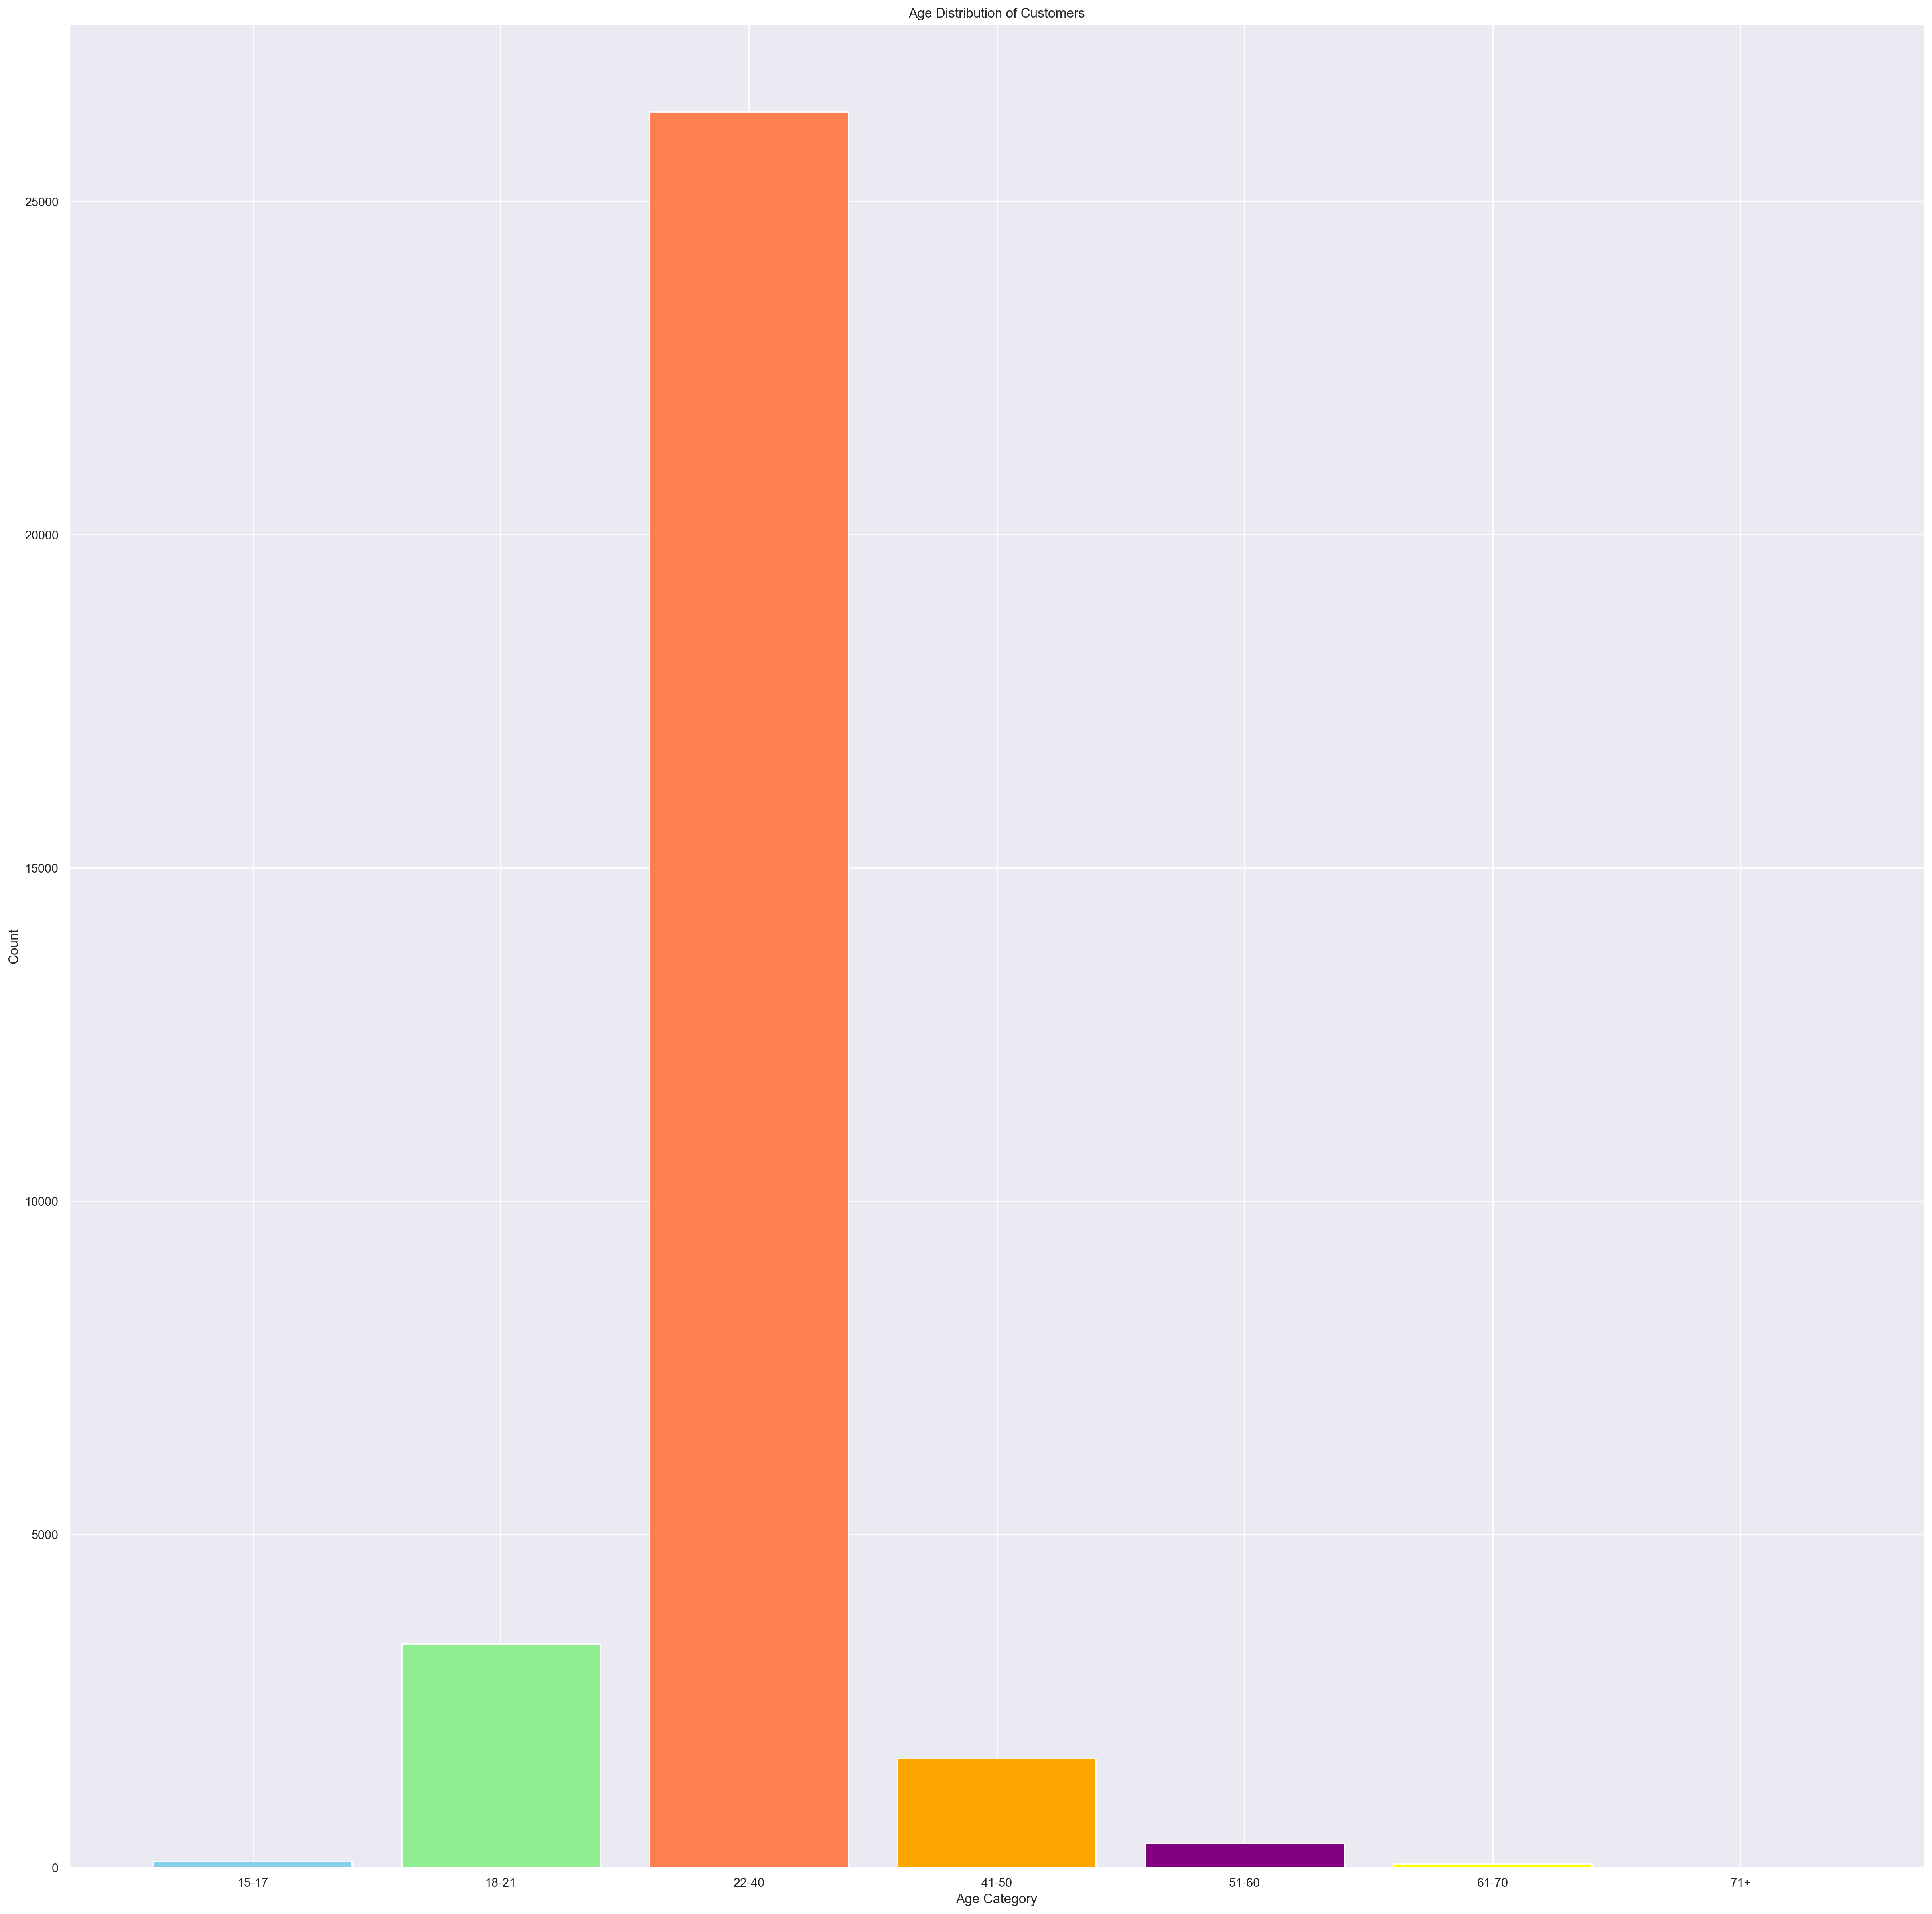

In [363]:

# Define age categories
bins = [15, 17, 21, 40, 50, 60, 70, 71]
labels = ['15-17', '18-21', '22-40', '41-50', '51-60', '61-70', '71+']

# Create a new column for age categories
ABCDE['Age Category'] = pd.cut(ABCDE['customer_age'], bins=bins, labels=labels, right=False)

# Count occurrences in each age category
age_distribution = ABCDE['Age Category'].value_counts()

# Sort the age distribution index to maintain the order of categories
age_distribution = age_distribution.reindex(labels)

# Set the figure size
plt.figure(figsize=(30, 30))

# Create a vertical bar graph
plt.bar(age_distribution.index, age_distribution.values, color=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow'])

# Customize the plot
plt.title('Age Distribution of Customers')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Show the plot
plt.show()

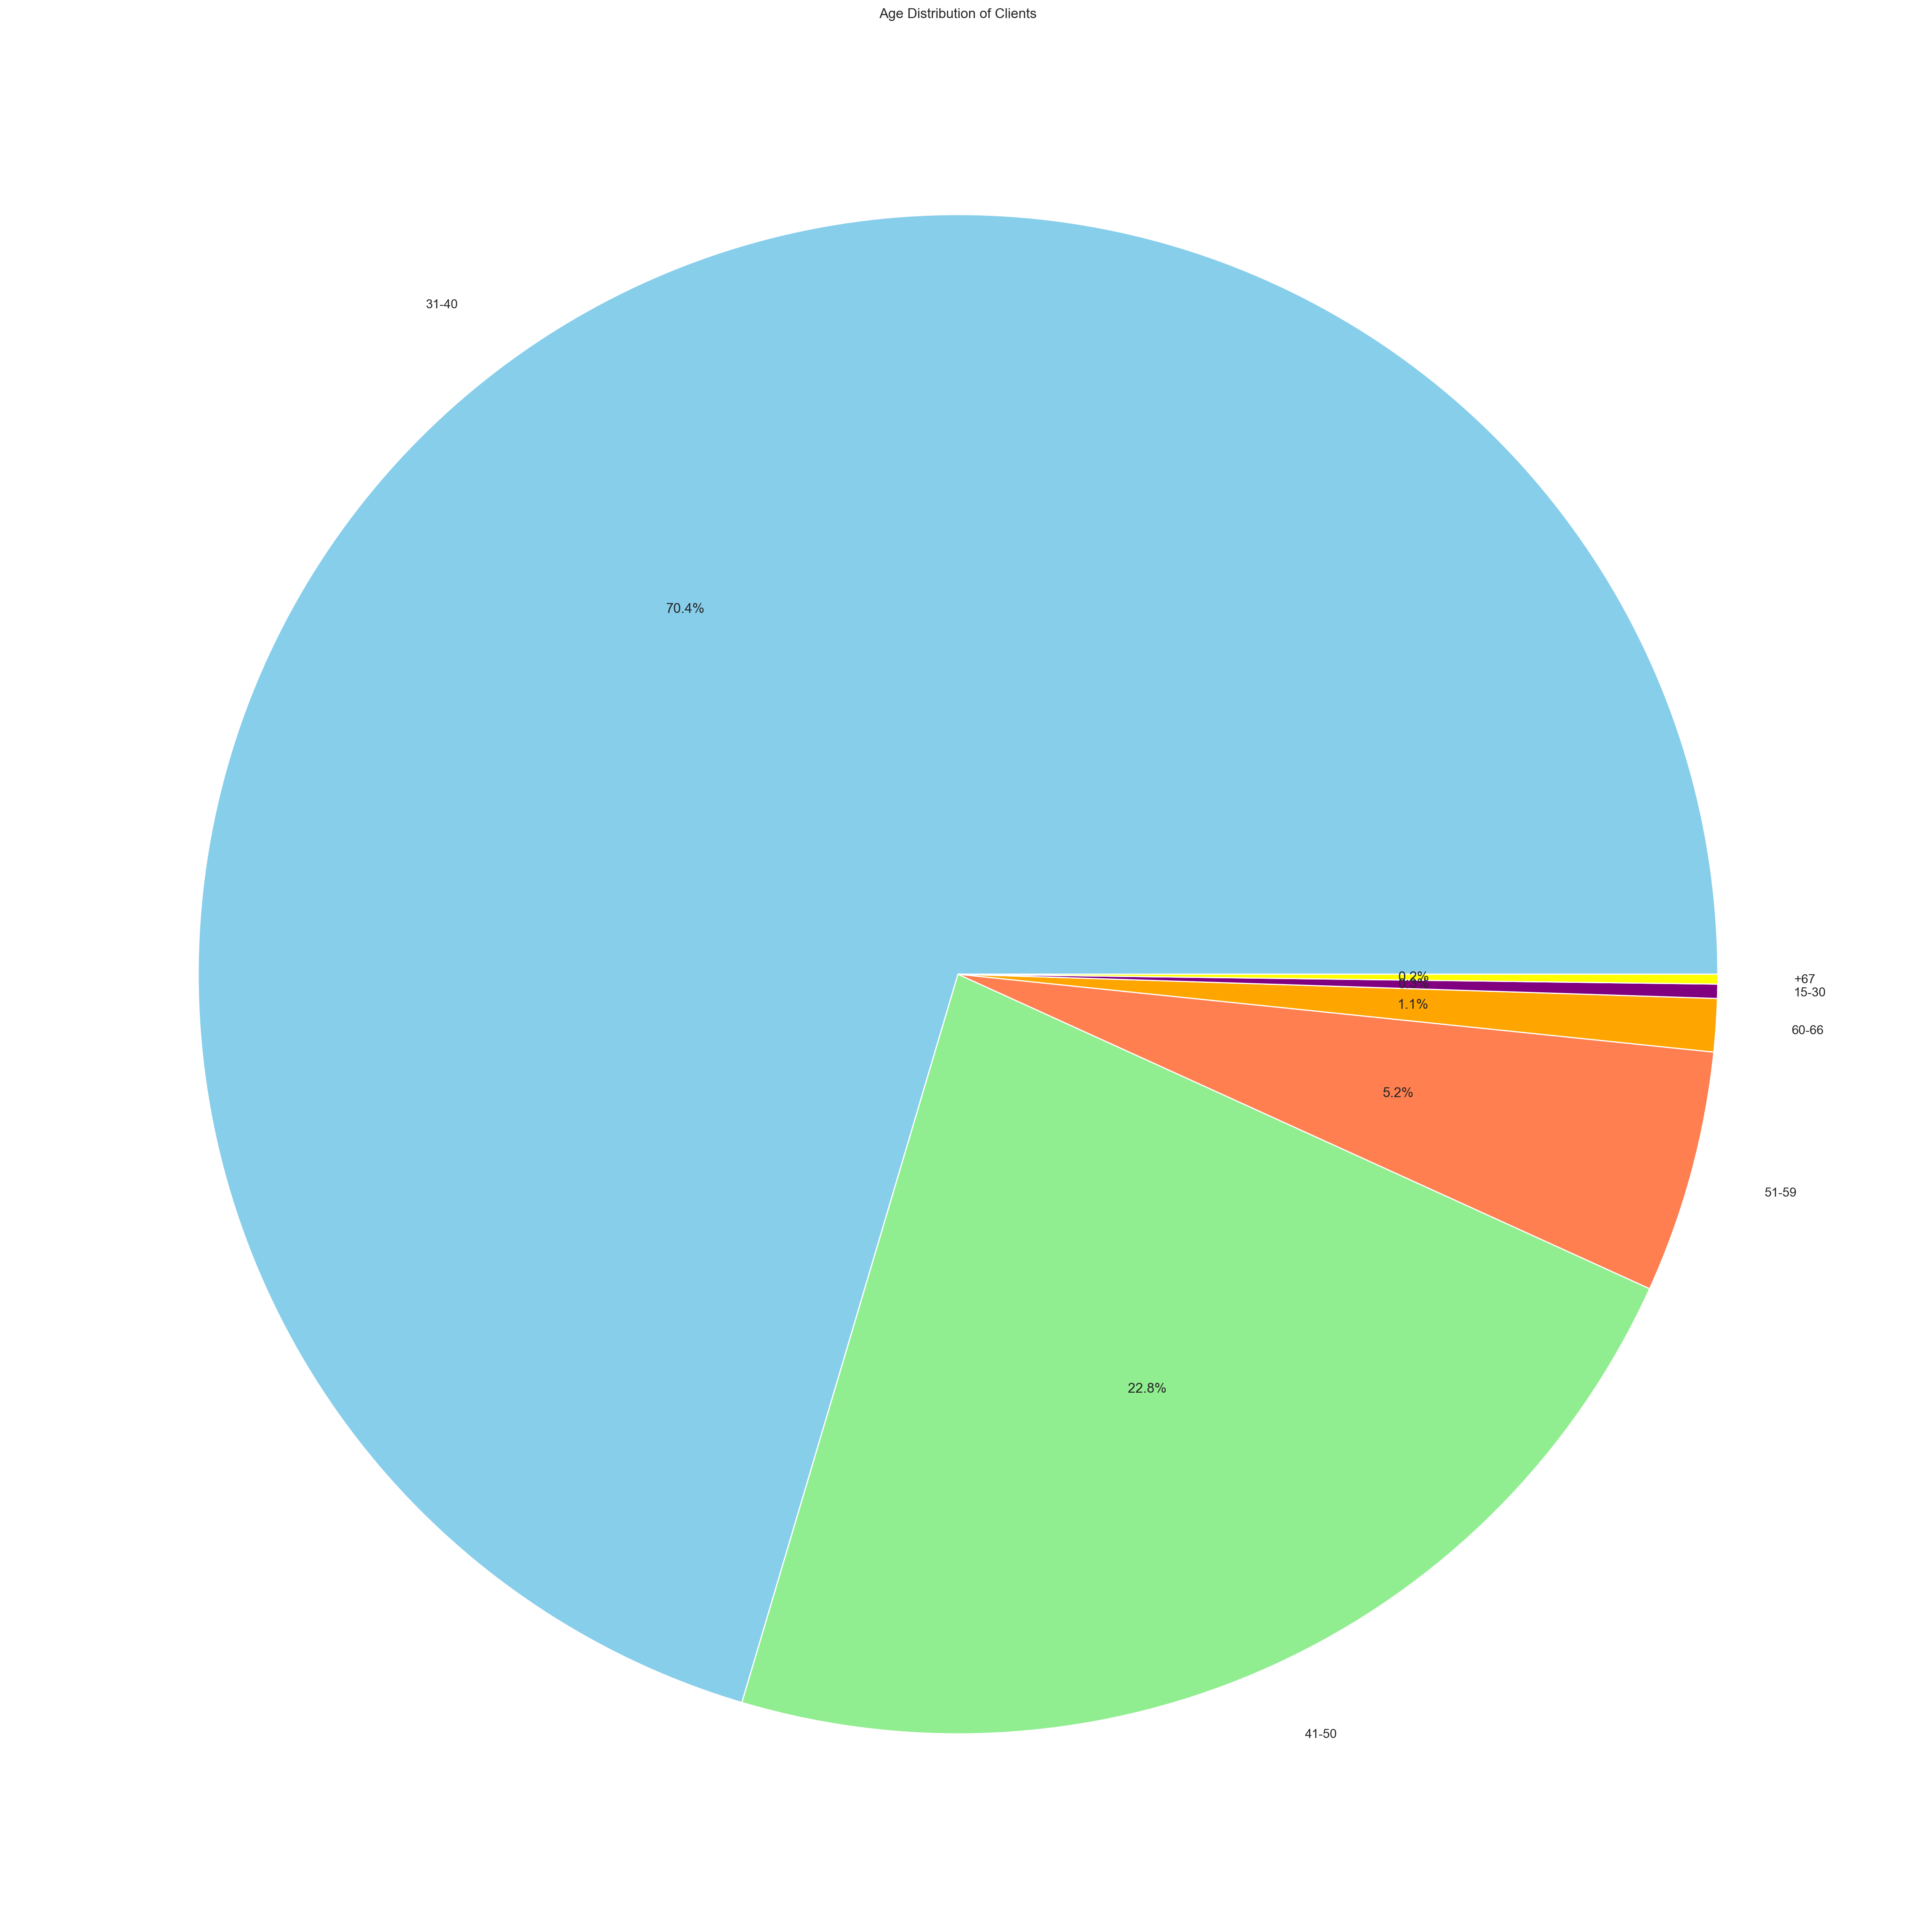

In [361]:
# Define age categories
bins = [0, 17, 30, 40, 50, 60, 74]
labels = ['15-30', '31-40', '41-50', '51-59', '60-66', '+67']

# Create a new column for age categories
ABCDE['Age Category'] = pd.cut(ABCDE['customer_age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age category
age_distribution = ABCDE['Age Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(30, 30))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age Distribution of Clients')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

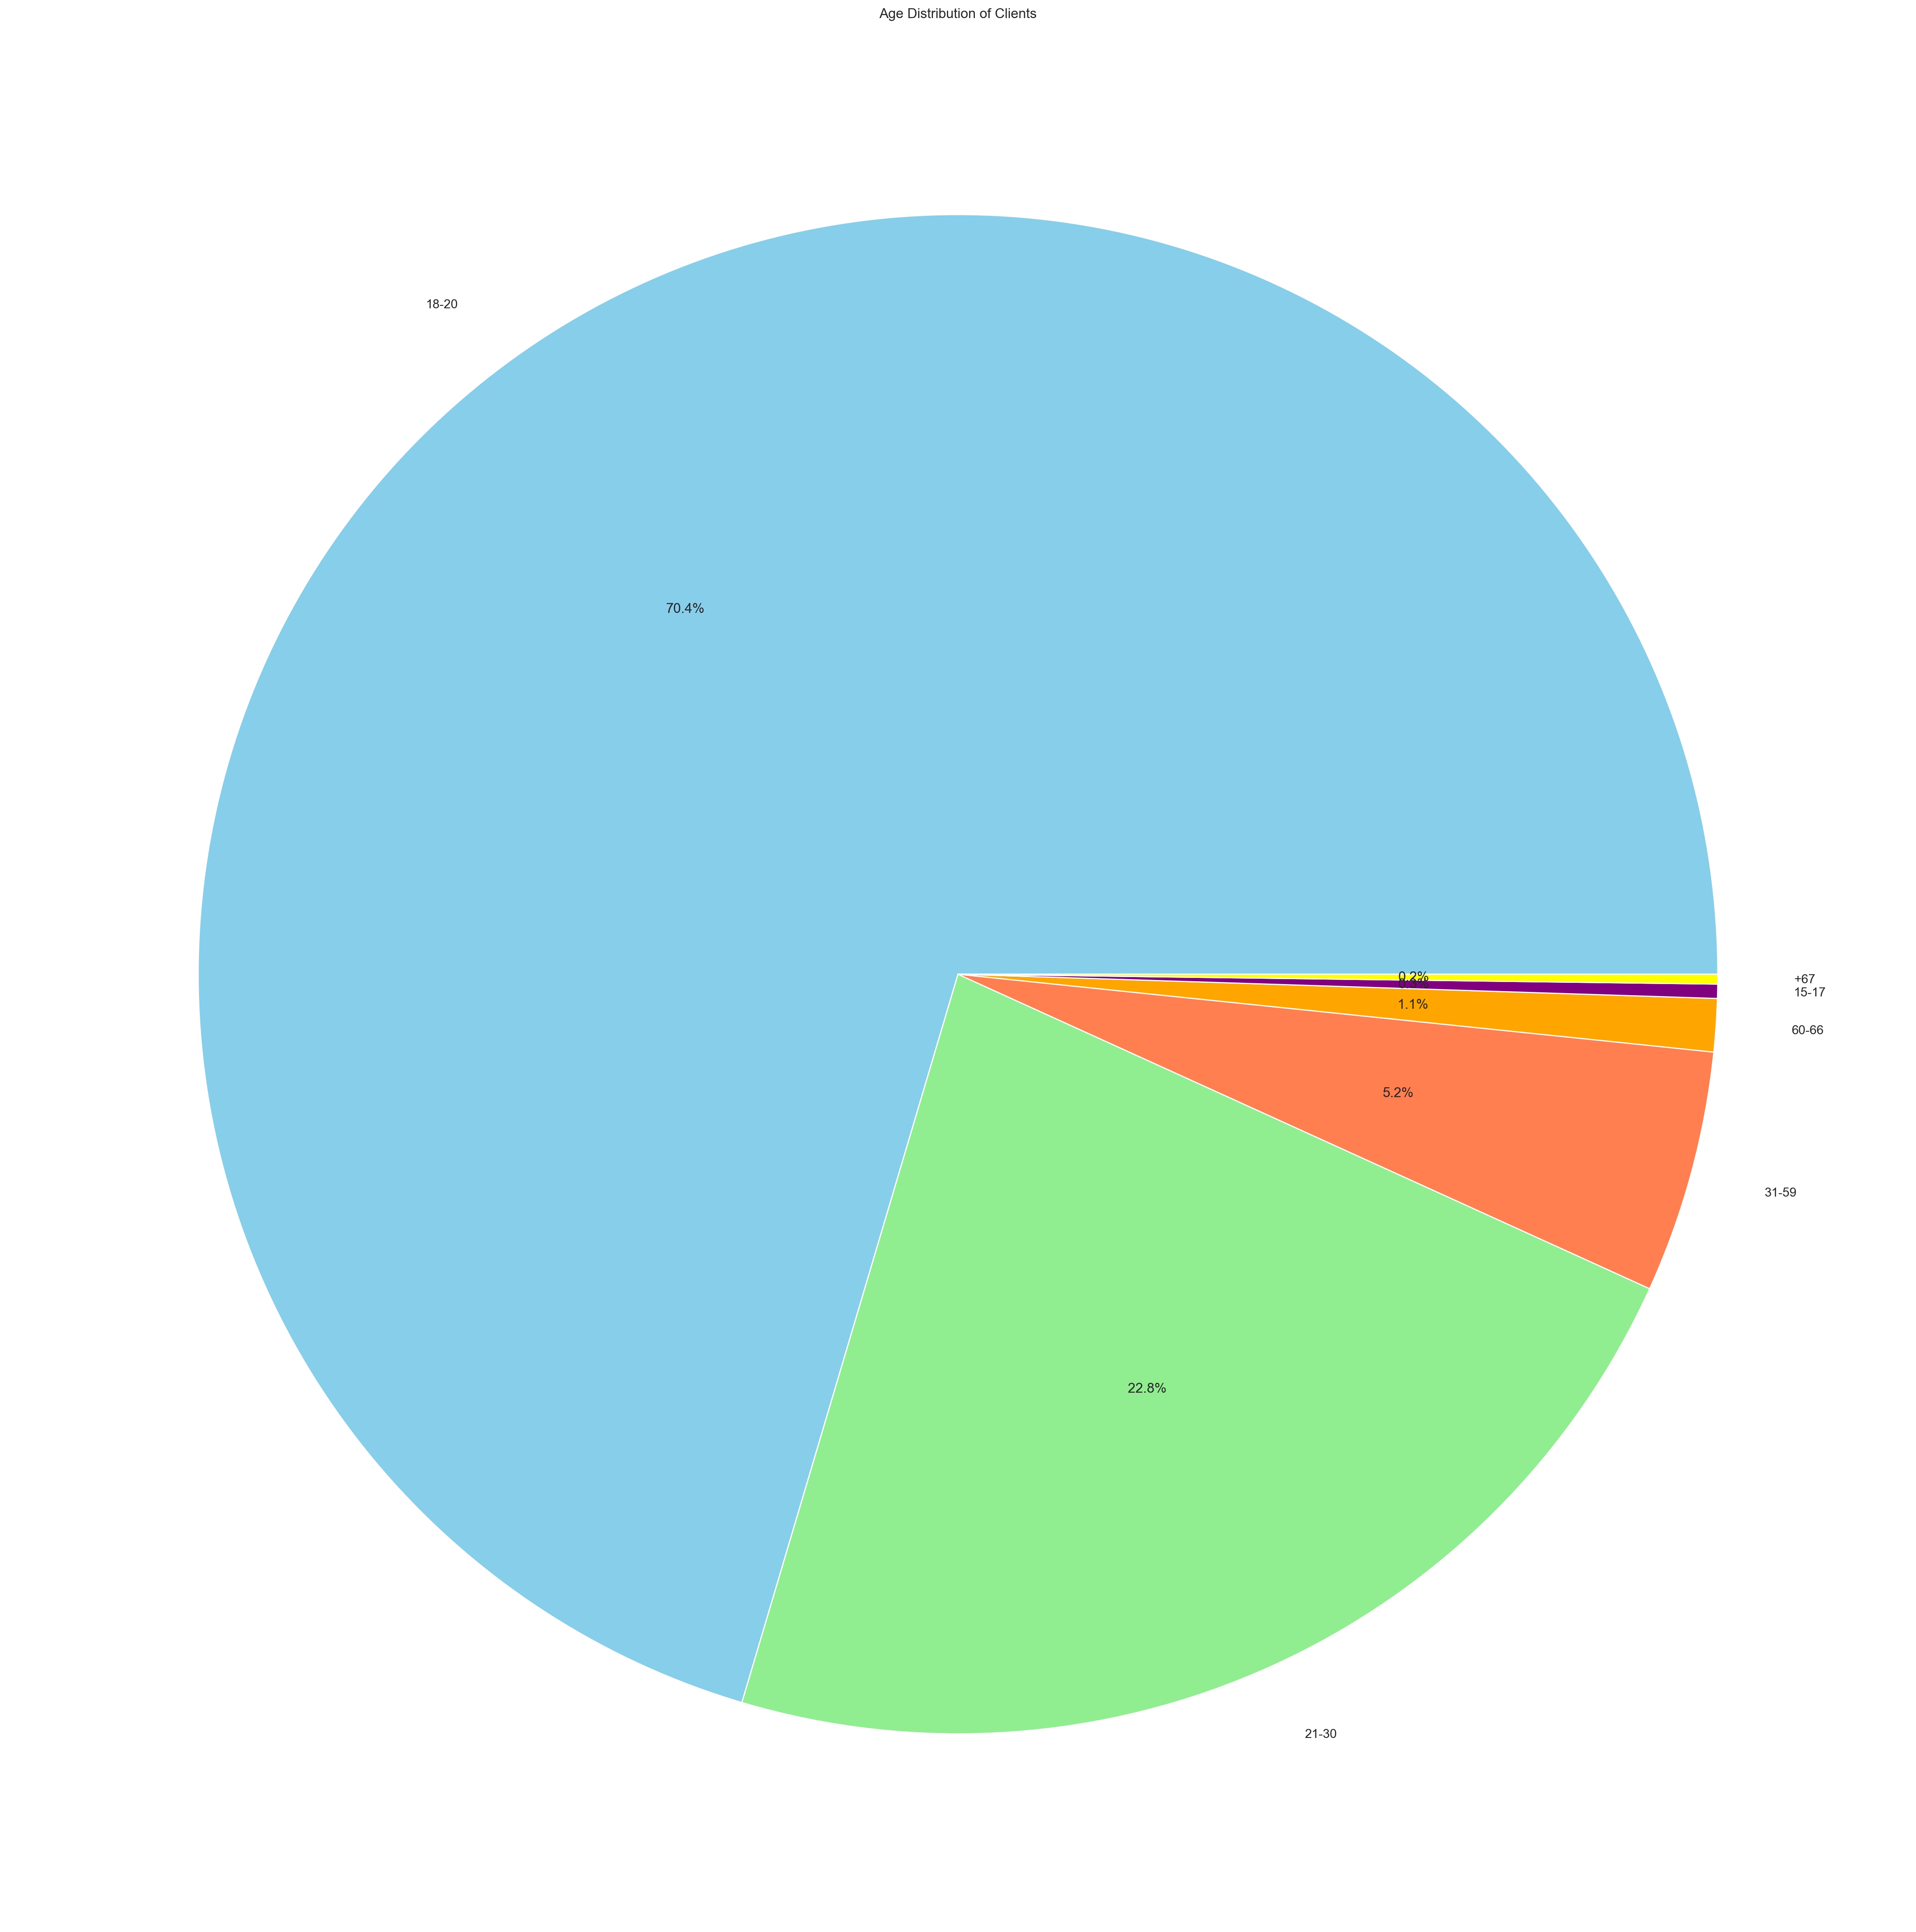

In [351]:
# Define age categories
bins = [0, 17, 30, 40, 50, 60, 74]
labels = ['15-17', '18-20', '21-30', '31-59', '60-66', '+67']

# Create a new column for age categories
ABCDE['Age Category'] = pd.cut(ABCDE['customer_age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age category
age_distribution = ABCDE['Age Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(30, 30))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age Distribution of Clients')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

# Scaling Data 